<a href="https://colab.research.google.com/github/joni901/BenfordLaw/blob/main/hypothesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=942d364bb18f6e7790198d99ad8900dd860e4c1d9e7bd5e5d11e966bc5f01fb7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import requests
import json
import wget
import pandas as pd
from zipfile import ZipFile

In [3]:
base_url = "https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/"
zip_files = []
for year in range(2018, 2024):
  zip_files.append(f"itr_cia_aberta_{year}.zip")

In [4]:
for file in zip_files:
    wget.download(base_url + file)
    with ZipFile(file, 'r') as zipObj:
        zipObj.extractall("CVM")

In [5]:
itr = "itr_public_company_"
file_type = ["ind_", "con_"]
files = ["BPA_", "BPP_", "DFC_MD_", "DFC_MI_", "DMPL_", "DRA_", "DRE_", "DVA_"]
list_of_dfs = []
path = "/content/"
for file in files:
    for f_type in file_type:
        for year in range(2018, 2023):
            try:
                print(f"{path}{itr}{file}{f_type}{year}")
                file_data = pd.read_csv(f"{path}{itr}{file}{f_type}{year}.csv", sep="|", encoding="ISO-8859-1", decimal=",")
                file_df = pd.DataFrame(file_data)

                file_df['Source'] = f"{itr}{file}{f_type}{year}"
                list_of_dfs.append(file_df)
            except:
                print(f"File {itr}{file}{f_type}{year} not found")


/content/itr_public_company_BPA_ind_2018
File itr_public_company_BPA_ind_2018 not found
/content/itr_public_company_BPA_ind_2019
File itr_public_company_BPA_ind_2019 not found
/content/itr_public_company_BPA_ind_2020
File itr_public_company_BPA_ind_2020 not found
/content/itr_public_company_BPA_ind_2021
File itr_public_company_BPA_ind_2021 not found
/content/itr_public_company_BPA_ind_2022
File itr_public_company_BPA_ind_2022 not found
/content/itr_public_company_BPA_con_2018
File itr_public_company_BPA_con_2018 not found
/content/itr_public_company_BPA_con_2019
File itr_public_company_BPA_con_2019 not found
/content/itr_public_company_BPA_con_2020
File itr_public_company_BPA_con_2020 not found
/content/itr_public_company_BPA_con_2021
File itr_public_company_BPA_con_2021 not found
/content/itr_public_company_BPA_con_2022
File itr_public_company_BPA_con_2022 not found
/content/itr_public_company_BPP_ind_2018
File itr_public_company_BPP_ind_2018 not found
/content/itr_public_company_BPP_

In [6]:
nivel_1={'ALPARGATAS S.A.':'ALPA','BANCO BMG S.A.':'BMGB','BCO BRADESCO S.A.':'BBDC','BCO ESTADO DO RIO GRANDE DO SUL S.A.':'BRSR',
         'BCO MERCANTIL DO BRASIL S.A.':'BMEB','BCO PAN S.A.':'BPAN','BRADESPAR S.A.':'BRAP','BRASKEM S.A.':'BRKM',
         'CENTRAIS ELET BRAS S.A. - ELETROBRAS'	:'ELET','CIA ENERGETICA DE MINAS GERAIS - CEMIG':'CMIG',
         'CIA FERRO LIGAS DA BAHIA - FERBASA':'FESA','CIA FIACAO TECIDOS CEDRO CACHOEIRA':'CEDO',
         'CTEEP - CIA TRANSMISSÃO ENERGIA ELÉTRICA PAULISTA':'TRPL', 'DEXXOS PARTICIPACOES S.A.':'DEXP',
        'EUCATEX S.A. INDUSTRIA E COMERCIO':'EUCA', "FRAS-LE S.A.":	'FRAS', "GERDAU S.A.":'GGBR', "IGUATEMI S.A.":"IGTI",
         "ITAU UNIBANCO HOLDING S.A.":"ITUB","ITAUSA S.A.":"ITSA","METALURGICA GERDAU S.A.":"GOAU","OI S.A.":"OIBR",
         "RANDON S.A. IMPLEMENTOS E PARTICIPACOES":"RAPT", "USINAS SID DE MINAS GERAIS S.A.-USIMINAS":'USIM'}


nivel_2={
    "ALUPAR INVESTIMENTO S/A":"ALUP", "AZUL S.A.":"AZUL","BCO ABC BRASIL S.A.":"ABCB", "BCO BTG PACTUAL S.A.":"BPAC",
    "BCO PINE S.A.":"PINE", "BR ADVISORY PARTNERS PARTICIPAÇÕES S.A.":"BRBI", "CENTRAIS ELET DE SANTA CATARINA S.A.":"CLSC",
    "CIA PARANAENSE DE ENERGIA - COPEL":"CPLE", "CIA SANEAMENTO DO PARANA - SANEPAR":"SAPR", "CSN MINERAÇÃO S.A.":"CMIN",
    "ENERGISA S.A.":"ENGI", "GOL LINHAS AEREAS INTELIGENTES S.A.":"GOLL", "KLABIN S.A.":"KLBN", "MARCOPOLO S.A.":"POMO",
    "MULTIPLAN - EMPREEND IMOBILIARIOS S.A.":"MULT", "PETROLEO BRASILEIRO S.A. PETROBRAS":"PETR", "RAIZEN S.A.":"RAIZ",
    "RENOVA ENERGIA S.A.":"RNEW", "TAURUS ARMAS S.A.":"TASA", "TRACK & FIELD CO S.A.":"TFCO",
    "TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.":"TAEE"
}

Novomercado={
    "3R PETROLEUM ÓLEO E GÁS S.A":"RRRP", "AERIS IND. E COM. DE EQUIP. GERACAO DE ENERGIA S/A":"AERI",
    "AES BRASIL ENERGIA S.A.":"AESB",'AGROGALAXY PARTICIPAÇÕES S.A.':"AGXY", "ALLIANÇA SAÚDE E PARTICIPAÇÕES S.A.":"ALLD",
    "ALLOS S.A	":"ALOS", 'ALLPARK EMPREENDIMENTOS PARTICIPACOES SERVICOS S.A':'ALPK',"ALPHAVILLE S.A.":"AVLL",
    "AMBIPAR PARTICIPACOES E EMPREENDIMENTOS S/A":"AMBP", "AMERICANAS S.A":"AMER","ANIMA HOLDING S.A.":"ANIM",
    "AREZZO INDÚSTRIA E COMÉRCIO S.A.":"ARZZ","ARMAC LOCAÇÃO. LOGÍSTICA E SERVIÇOS S.A.":"ARML",
    "ATACADÃO S.A.":'CRFB', 'AUREN ENERGIA S.A.':"AURE", "B3 S.A. - BRASIL. BOLSA. BALCÃO":"B3SA",
    "BB SEGURIDADE PARTICIPAÇÕES S.A.":"BBSE", "BCO BRASIL S.A.":"BBAS","BEMOBI MOBILE TECH S.A.":'BMOB',
    'BLAU FARMACÊUTICA S.A.':"BLAU", "BOA SAFRA SEMENTES S.A.":"SOJA", "BRASILAGRO - CIA BRAS DE PROP AGRICOLAS":"AGRO",
    "BRF S.A.":"BRFS", "BRISANET PARTICIPAÇÕES S.A.":"BRIT","CAIXA SEGURIDADE PARTICIPAÇÕES S.A.":"CXSE",
    "CAMIL ALIMENTOS S.A.":"CAML", "CCR S.A.":"CCRO", "CEA MODAS S.A.":"CEAB", "CIA BRASILEIRA DE DISTRIBUICAO":"PCAR",
    "CIA SANEAMENTO BASICO EST SAO PAULO":"SBSP", "CIA SANEAMENTO DE MINAS GERAIS-COPASA":"CSMG",
    "CIELO S.A. - INSTITUIÇÃO DE PAGAMENTO":"CIEL", "CLEAR SALE S.A.":"CLSA", "CM HOSPITALAR S.A.":"VVEO",
    "COGNA EDUCAÇÃO S.A.":"COGN","COMPANHIA BRASILEIRA DE ALUMÍNIO":'CBAV','CONSTRUTORA TENDA S.A.':"TEND",
    'COSAN S.A.':'CSAN', 'CPFL ENERGIA S.A.':'CPFE', 'CRUZEIRO DO SUL EDUCACIONAL S.A.':'CSED',
    'CSU DIGITAL S.A.':'CSUD', 'CURY CONSTRUTORA E INCORPORADORA S.A.':"CURY",
    "CVC BRASIL OPERADORA E AGÊNCIA DE VIAGENS S.A.":"CVCB", 'CYRELA BRAZIL REALTY S.A.EMPREEND E PART':"CYRE",
    "D1000 VAREJO FARMA PARTICIPAÇÕES S.A.":"DMVF", "DESKTOP S.A.":"DESK", "DEXCO S.A.":"DXCO",
    "DIAGNOSTICOS DA AMERICA S.A.":"DASA", "DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS":"PNVL",
    "DIRECIONAL ENGENHARIA S.A.":"DIRR", "DOTZ S.A.":"DOTZ", "ECORODOVIAS INFRAESTRUTURA E LOGÍSTICA S.A.":"ECOR",
    "ELETROMIDIA S.A.":"ELMD", "EMBRAER S.A.":"EMBR", "EMPREENDIMENTOS PAGUE MENOS S.A.":"PGMN",
    "NAUTA PARTICIPAÇÕES S.A.":"ENAT","ENEVA S.A":"ENEV","ENGIE BRASIL ENERGIA S.A.":"EGIE",
    "ENJOEI S.A.":"ENJU", "EQUATORIAL ENERGIA S.A.":"EQTL", "ETERNIT S.A.":"ETER",
    "EVEN CONSTRUTORA E INCORPORADORA S.A.":"EVEN", "EZ TEC EMPREEND. E PARTICIPACOES S.A.":"EZTC",
    "FERTILIZANTES HERINGER S.A.":'FHER', "FLEURY S.A.":"FLRY", "GAFISA S.A.":"GFSA",
    "GETNINJAS S.A.":"NINJ", "GPS PARTICIPACOES E EMPREENDIMENTOS S.A.":"GGPS",
    "GRENDENE S.A.":"GRND", "GRUPO CASAS BAHIA S.A.":"BHIA", "GRUPO DE MODA SOMA S.A.":'SOMA','GRUPO MATEUS S.A.':"GMAT",
    "GRUPO SBF SA":"SBFG","GUARARAPES CONFECCOES S.A.":'GUAR',"HAPVIDA PARTICIPACOES E INVESTIMENTOS SA":"HAPV",
    "HBR REALTY EMPREENDIMENTOS IMOBILIARIOS S/A":"HBRE", "HELBOR EMPREENDIMENTOS S.A.":"HBOR", "HIDROVIAS DO BRASIL S.A.":"HBSA",
    "HOSPITAL MATER DEI S/A":"MATD", "HYPERA S.A.":"HYPE", "INFRACOMMERCE CXAAS S.A.":"IFCM",
    "INTELBRAS S.A. IND DE TELEC ELETRONICA BRASILEIRA":"INTB", "INTERNATIONAL MEAL COMPANY ALIMENTACAO S.A.":"MEAL",
    "IOCHPE MAXION S.A.":"MYPK", "IRANI PAPEL E EMBALAGEM S.A.":'RANI', "IRB - BRASIL RESSEGUROS S.A.":"IRBR",
    "JALLES MACHADO S.A.":"JALL", "JBS S.A.":"JBSS", "JHSF PARTICIPACOES S.A.":"JHSF", "JSL S.A.":"JSLG",
    "KEPLER WEBER S.A.":'KEPL', "KORA SAÚDE PARTICIPAÇÕES S.A":'KRSA', "LAVVI EMPREENDIMENTOS IMOBILIÁRIOS S.A.":"LAVV",
    "LIGHT S.A.":"LIGT", 'LIVETECH DA BAHIA INDUSTRIA E COMERCIO S/A':"LVTC", 'LOCALIZA RENT A CAR S.A.':"RENT",
    'LOCAWEB SERVIÇOS DE INTERNET S.A.':"LWSA", "LOG COMMERCIAL PROPERTIES":"LOGG", "LOG-IN LOGISTICA INTERMODAL S.A.":'LOGN',
    'LOJAS QUERO-QUERO S/A':'LJQQ', "LOJAS RENNER S.A.":'LREN',"LPS BRASIL - CONSULTORIA DE IMOVEIS S.A.":"LPSB",
    "LUPATECH S.A.":'LUPA', "M.DIAS BRANCO S.A. IND COM DE ALIMENTOS":"MDIA", "MAGAZINE LUIZA S.A.":"MGLU",
    "MAHLE-METAL LEVE S.A.":"LEVE", "MARFRIG GLOBAL FOODS S.A.":"MRFG", "MARISA LOJAS S.A.":"AMAR",
    "MÉLIUZ S.A.":'CASH', 'MELNICK DESENVOLVIMENTO IMOBILIÁRIO S.A.':"MELK", "METALFRIO SOLUTIONS S.A.":'FRIO',
    'MILLS LOCAÇÃO. SERVIÇOS E LOGÍSTICA S.A':'MILS', 'MINERVA S.A.':'BEEF','MITRE REALTY EMPREENDIMENTOS E PARTICIPAÇÕES S.A.':'MTRE',
    "MOBLY S.A.":"MBLY", "MOURA DUBEUX ENGENHARIA S/A":'MDNE', 'MOVIDA PARTICIPACOES SA':"MOVI", 'MPM CORPÓREOS S.A.':'ESPA',
    'MRV ENGENHARIA E PARTICIPACOES S.A.':'MRVE', "MULTILASER INDUSTRIAL S.A.":'MLAS',"NATURA &CO HOLDING S.A.":"NTCO",
    "NEOENERGIA S.A.":'NEOE',"NEOGRID PARTICIPACOES S.A.":"NGRD", "NEXPE PARTICIPAÇÕES S.A":"NEXP",
    "OCEANPACT SERVICOS MARITIMOS S.A.":"OPCT", "ODONTOPREV S.A.":"ODPV", "ONCOCLINICAS DO BRASIL SERVICOS MEDICOS S.A.":'ONCO',
    "ORIZON VALORIZACAO DE RESIDUOS S.A.":'ORVR', "OSX BRASIL S.A.":'OSXB', "OURO FINO SAUDE ANIMAL PARTICIPACOES S.A.":'OFSA',
    "PADTEC HOLDING S.A.":"PDTC", "PARANAPANEMA S.A.":"PMAM", "PBG S/A":"PTBL", "PDG REALTY S.A. EMPREEND E PARTICIPACOES":"PDGR",
    "PET CENTER COMERCIO E PARTICIPACOES S.A.":"PETZ", "PETRORECÔNCAVO S.A.":"RECV",
    "PLANO & PLANO DESENVOLVIMENTO IMOBILIÁRIO S.A.":"PLPL", "POMIFRUTAS S/A":"FRTA", "PORTO SEGURO S.A.":"PSSA",
    "POSITIVO TECNOLOGIA S.A.":"POSI", "PRINER SERVIÇOS INDUSTRIAIS S.A.":"PRNR", "PRIO S.A.":"PRIO",
    "PROFARMA DISTRIB PROD FARMACEUTICOS S.A.":"PFRM", "QUALICORP CONSULTORIA E CORRETORA DE SEGUROS S.A.":"QUAL",
    "RAIA DROGASIL S.A.":"RADL","REDE DOR SÃO LUIZ S.A.":"RDOR", "RNI NEGÓCIOS IMOBILIÁRIOS S.A.":"RDNI","ROMI S.A.":"ROMI",
    "ROSSI RESIDENCIAL S.A.":"RSID", "RUMO S.A.":"RAIL", "SANTOS BRASIL PARTICIPACOES S.A.":"STBP",
    "SAO CARLOS EMPREEND E PARTICIPACOES S.A.":'SCAR', "SAO MARTINHO S.A.":"SMTO", "SENDAS DISTRIBUIDORA S.A.":'ASAI',
    "SEQUOIA LOGISTICA E TRANSPORTES S.A":"SEQL", "SER EDUCACIONAL S.A.":'SEER', 'SERENA ENERGIA S.A.':"SRNA",
    "SIMPAR S.A.":'SIMH', "SLC AGRICOLA S.A.":"SLCE", "SMARTFIT ESCOLA DE GINÁSTICA E DANÇA S.A.":	"SMFT",
    "SPRINGS GLOBAL PARTICIPACOES S.A.":"SGPS", "SUZANO S.A.":"SUZB", "SYN PROP E TECH S.A.":"SYNE",
    'T4F ENTRETENIMENTO S.A.':"SHOW", 'TC S.A.':"TRAD", "TECHNOS S.A.":"TECN", "TECNISA S.A.":'TCSA',
    "TEGMA GESTAO LOGISTICA S.A.":"TGMA", 'TERRA SANTA PROPRIEDADES AGRICOLAS S.A.':"LAND", "TIM S.A.":"TIMS",
    "TOTVS S.A.":"TOTS", "TPI - TRIUNFO PARTICIP. E INVEST. S.A.":"TPIS", "TRÊS TENTOS AGROINDUSTRIAL S/A":"TTEN",
    'TRISUL S.A.':"TRIS", "TUPY S.A.":"TUPY", "ULTRAPAR PARTICIPACOES S.A.":"UGPA","UNICASA INDÚSTRIA DE MÓVEIS S.A.":"UCAS",
    "UNIFIQUE TELECOMUNICAÇÕES S.A.":"FIQE", "VALE S.A.":"VALE", "VALID SOLUÇÕES S.A.":"VLID",
    "VAMOS LOCAÇÃO DE CAMINHÕES. MÁQUINAS E EQUIP. S.A.":'VAMO', "VESTE S.A. ESTILO":"VSTE", "VIBRA ENERGIA S.A.":"VBBR",
    'VITTIA S.A.':"VITT", "VIVARA PARTICIPAÇOES S.A":"VIVA", "VIVER INCORPORADORA E CONSTRUTORA S.A.":"VIVR", 'VULCABRAS S.A.':'VULC',
    "WEG S.A.":"WEGE", 'WESTWING COMERCIO VAREJISTA S.A.':'WEST', 'WILSON SONS S.A.':'PORT',
    "WIZ CO PARTICIPAÇÕES E CORRETAGEM DE SEGUROS S.A.":"WIZC", "YDUQS PARTICIPACOES S.A.":	"YDUQ"
}

In [7]:
import os
import pandas as pd

folder_path = '/content/CVM'  # Replace with the actual path
all_files = os.listdir(folder_path)

# Dictionary to store DataFrames by year
dfs_by_year = {
    2018: [],
    2019: [],
    2020: [],
    2021: [],
    2022: [],
    2023: []
}

# Iterating through the files in the folder
for file in all_files:
    file_path = os.path.join(folder_path, file)

    # Check if the file is of the desired type (CSV or Excel)
    for year in range(18, 24):
        if file.endswith(f'{year}.csv'):
            try:
                df = pd.read_csv(file_path, encoding='latin1', delimiter=';')  # Try 'latin1'
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='cp1252')  # Try 'cp1252' if 'latin1' fails
                except UnicodeDecodeError:
                    print(f"Unable to read the file {file_path} due to an encoding error.")
                    continue
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            continue  # Skip files that are not of the desired type

        # Add the DataFrame to the correct list based on the year
        dfs_by_year[year + 2000].append(df)

# Concatenate the DataFrames for each year
for year in dfs_by_year:
    if dfs_by_year[year]:
        dfs_by_year[year] = pd.concat(dfs_by_year[year], ignore_index=True)




In [8]:
# Function to check the company's code
def check_company(company):
    if company in nivel_1.keys():
        return "lista_1"
    elif company in nivel_2.keys():
        return "lista_2"
    elif company in Novomercado.keys():
        return "NovoMercado"
    else:
        pass

# Apply the function to the column
for year, df in dfs_by_year.items():
    df['code'] = df['DENOM_CIA'].apply(check_company)
for year, df in dfs_by_year.items():
    df


In [10]:
import numpy as np
from collections import Counter

# Função para contar o primeiro dígito em uma coluna e retornar frequências relativas (porcentagem)
def count_first_digits(df):
    digit_frequency = {}
    total_count = 0

    for num in df['VL_CONTA']:
        # Converte o valor para string, remove sinais e zeros à esquerda, e verifica se começa com dígito válido
        str_num = str(num).lstrip('-').lstrip('0')
        if str_num and str_num[0].isdigit() and str_num[0] in '123456789':
            first_digit = str_num[0]
            # Incrementa a contagem para o dígito no dicionário
            digit_frequency[first_digit] = digit_frequency.get(first_digit, 0) + 1
            total_count += 1

    # Converte as contagens em porcentagens
    for digit in digit_frequency:
        digit_frequency[digit] = (digit_frequency[digit] / total_count) * 100

    return digit_frequency

    # Converte as contagens em porcentagens
    for digit in digit_frequency:
        digit_frequency[digit] = (digit_frequency[digit] / total_count) * 100

    return digit_frequency

# Função para calcular a distribuição esperada de acordo com a Lei de Benford, em porcentagens
def benford_distribution(d):
    return np.log10(1 + 1 / d) * 100

# Função para calcular a distribuição esperada segundo a Lei de Benford para dígitos 1 a 9
def benford_law():
    return [benford_distribution(d) for d in range(1, 10)]

# Função para calcular o d* entre as frequências observadas e esperadas
def calculate_d_star(observed_perc, expected_perc):
    squared_diffs = [(obs - exp) ** 2 for obs, exp in zip(observed_perc, expected_perc)]
    d_star = np.sqrt(sum(squared_diffs)) / 1.03606  # fator de normalização para Benford
    return d_star
def convert_to_percentage(frequencies):
    total = sum(frequencies.values())
    return [(frequencies[str(d)] / total) * 100 for d in range(1, 10)]


Analisando o ano 2018:
Frequências do primeiro dígito para a categoria lista_1 no ano 2018:
{'5': 7.821354850816288, '7': 6.068680803152562, '1': 30.868830925126666, '9': 4.511165321823982, '2': 17.035091011446802, '4': 10.114468005254269, '3': 11.8521298555076, '8': 5.0985175455057234, '6': 6.62976168136611}
d* para o dígito 1 na categoria lista_1 no ano 2018: 0.7391766487737657%
d* para o dígito 2 na categoria lista_1 no ano 2018: 0.5540556474734302%
d* para o dígito 3 na categoria lista_1 no ano 2018: 0.6194079544837093%
d* para o dígito 4 na categoria lista_1 no ano 2018: 0.40872797371641306%
d* para o dígito 5 na categoria lista_1 no ano 2018: 0.09340168903943168%
d* para o dígito 6 na categoria lista_1 no ano 2018: 0.06265783998534014%
d* para o dígito 7 na categoria lista_1 no ano 2018: 0.2601066592512874%
d* para o dígito 8 na categoria lista_1 no ano 2018: 0.016152249128820514%
d* para o dígito 9 na categoria lista_1 no ano 2018: 0.06233590163072841%
Frequências do primeiro dí

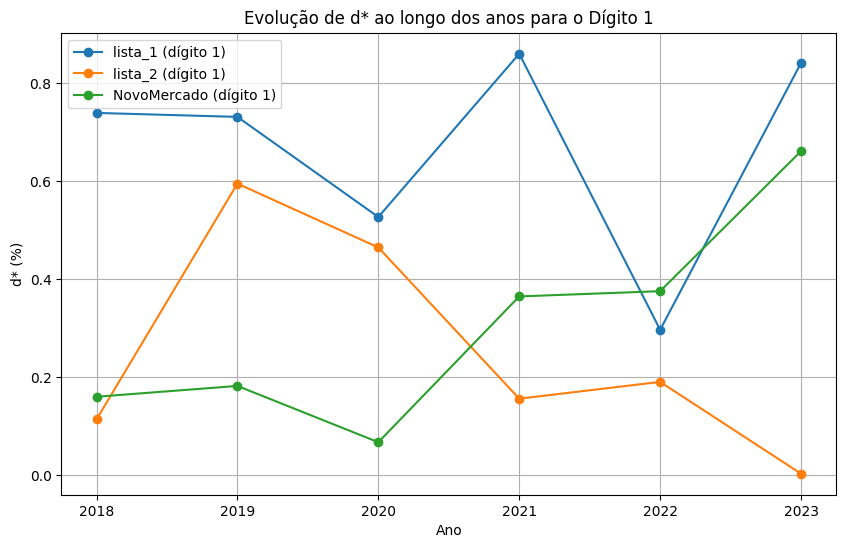

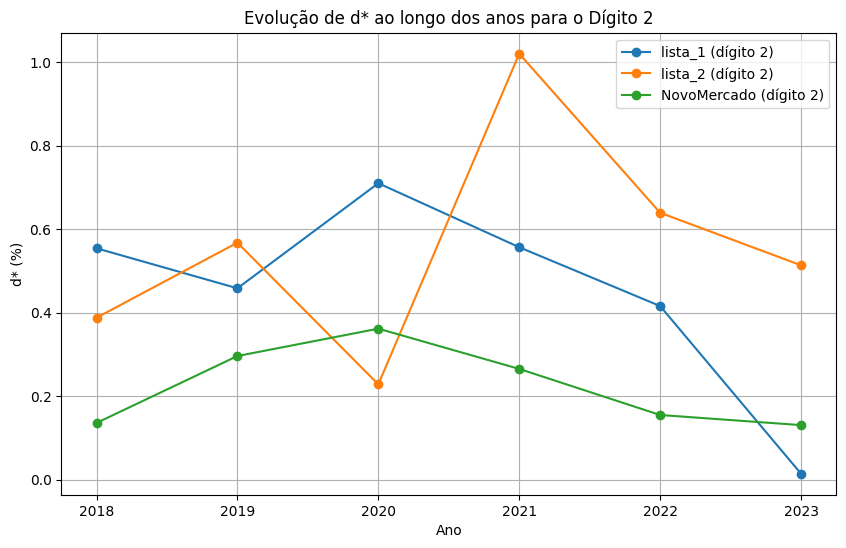

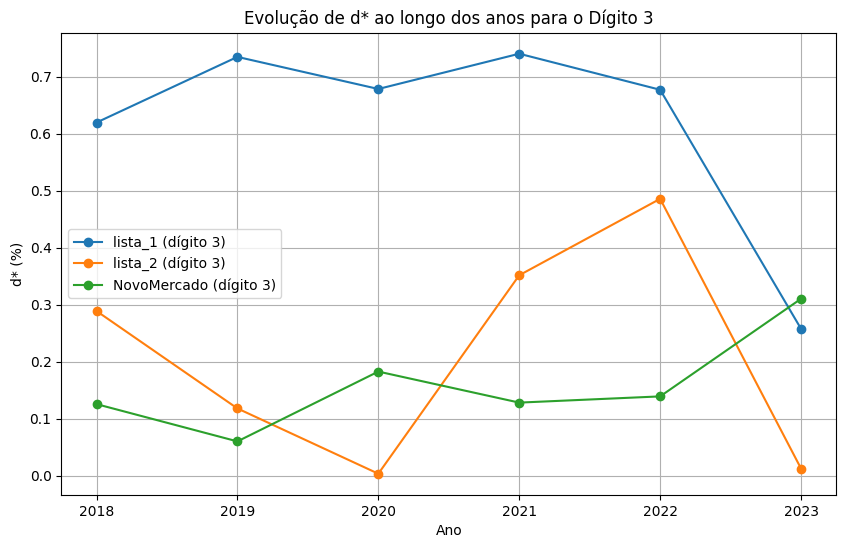

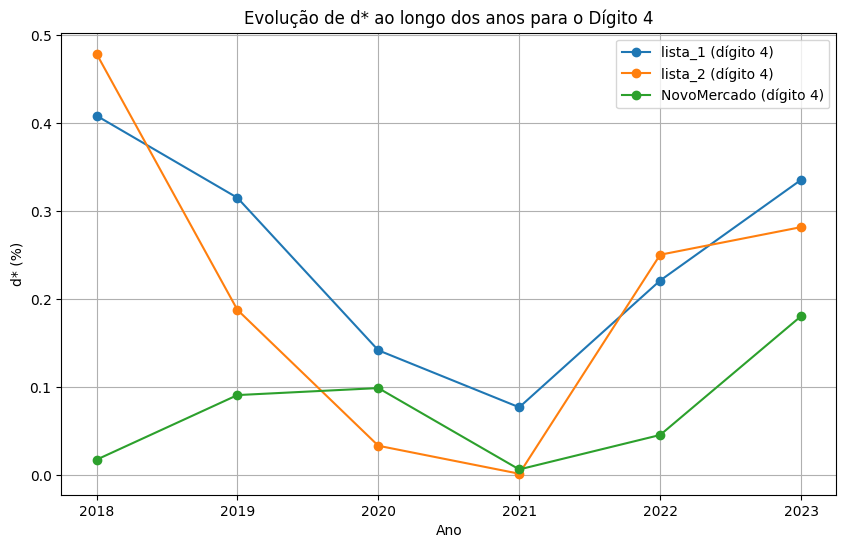

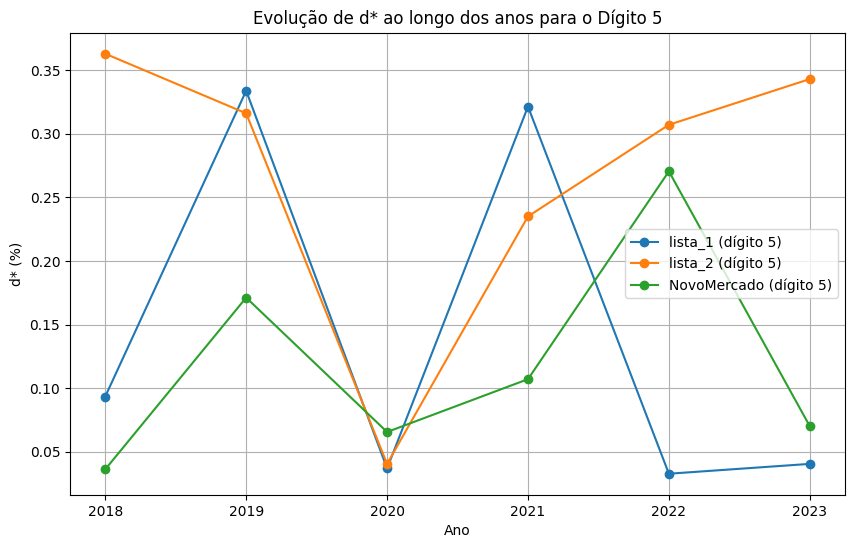

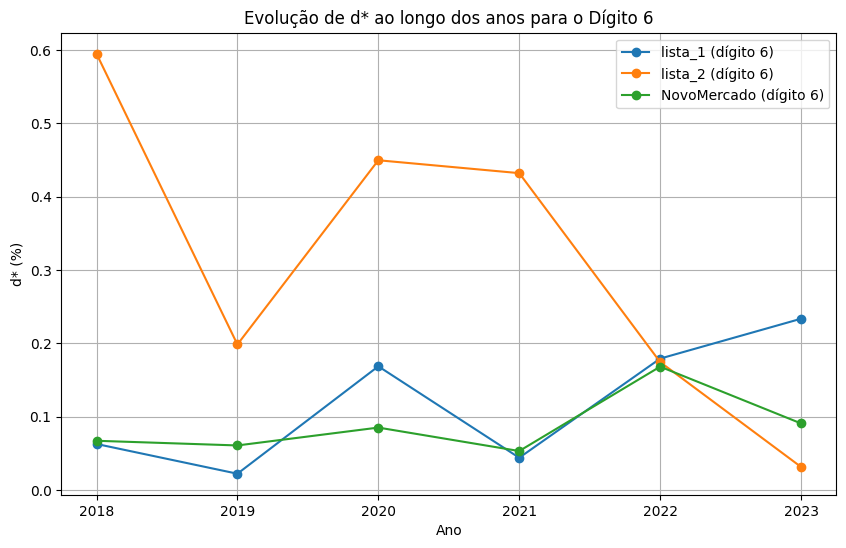

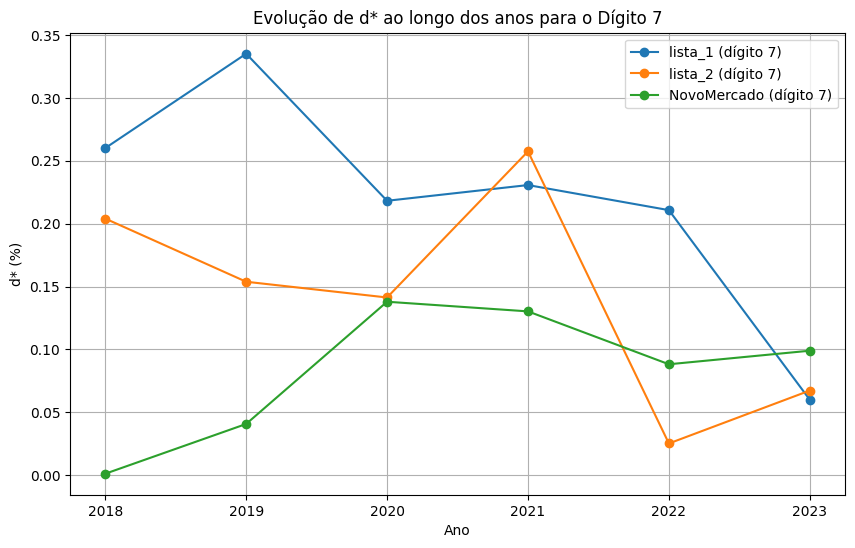

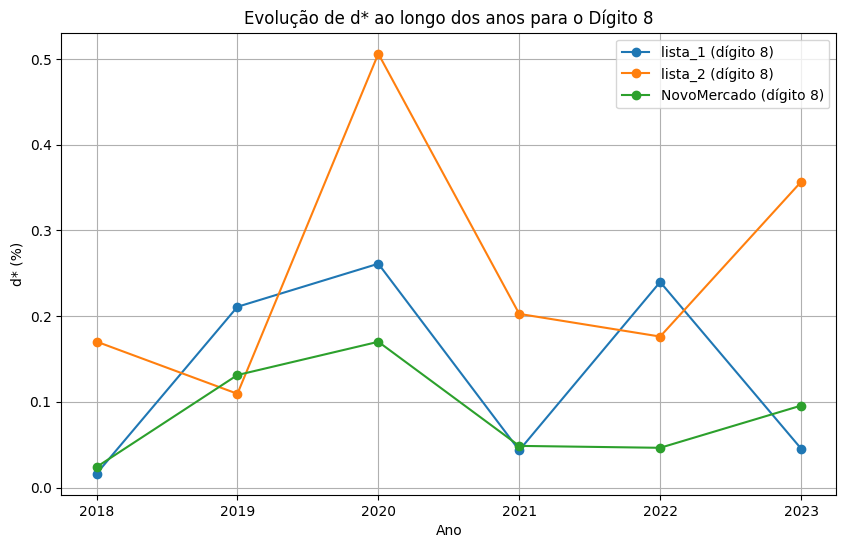

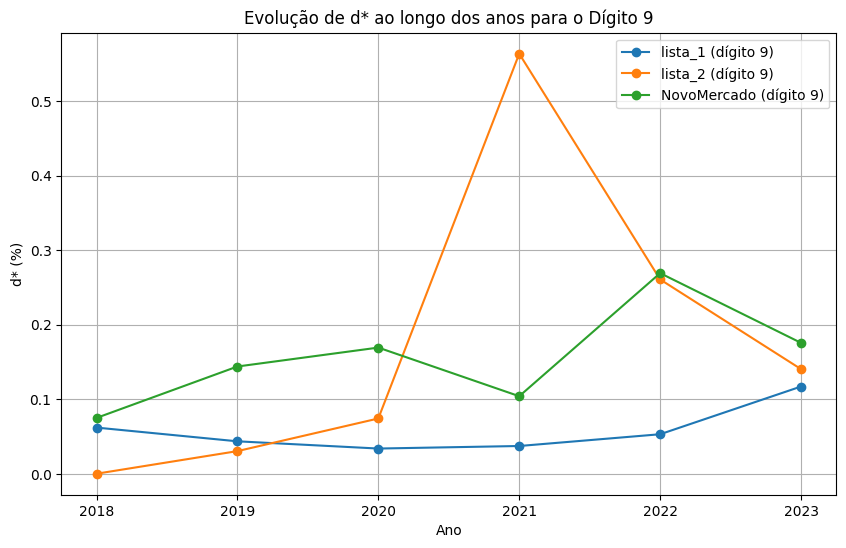

In [12]:
import matplotlib.pyplot as plt
# Dicionário para armazenar os valores d* para cada dígito por categoria
d_star_by_digit_and_category = {digit: {category: [] for category in ["lista_1", "lista_2", "NovoMercado"]} for digit in range(1, 10)}

# Iterar por ano
for year, df in sorted(dfs_by_year.items()):  # Ordena os anos ao iterar
    print(f"Analisando o ano {year}:")

    # Calcular o valor d* para cada categoria
    for category in ["lista_1", "lista_2", "NovoMercado"]:
        # Filtrar o DataFrame para a categoria atual
        df_category = df[df['code'] == category]

        if df_category.empty:
            print(f"Sem dados para a categoria {category} no ano {year}.")
            continue

        # Obter as frequências do primeiro dígito para a categoria
        freq_categoria = count_first_digits(df_category)
        print(f"Frequências do primeiro dígito para a categoria {category} no ano {year}:")
        print(freq_categoria)

        # Calcular a distribuição observada em porcentagens para cada dígito
        total_observed = sum(freq_categoria.values())
        observed_perc = [(freq_categoria.get(str(d), 0) / total_observed) * 100 for d in range(1, 10)]

        # Calcular a distribuição esperada de Benford em porcentagens
        benford_porcentagens = [benford_distribution(d) for d in range(1, 10)]

        # Calcular o d* para cada dígito entre frequências observadas e esperadas em porcentagem
        for digit in range(1, 10):
            # Calcular o d* apenas para o dígito atual
            d_star_value = calculate_d_star([observed_perc[digit - 1]], [benford_porcentagens[digit - 1]])
            d_star_by_digit_and_category[digit][category].append({'year': year, 'd_star': d_star_value})
            print(f"d* para o dígito {digit} na categoria {category} no ano {year}: {d_star_value}%")

# Plotar os valores de d* ao longo dos anos para cada dígito
for digit in range(1, 10):
    plt.figure(figsize=(10, 6))
    for category, values in d_star_by_digit_and_category[digit].items():
        # Extrai os anos e os valores d* para cada categoria
        years_for_category = [entry['year'] for entry in values]
        d_star_values = [entry['d_star'] for entry in values]

        # Adiciona os anos e os valores d* ao gráfico
        plt.plot(years_for_category, d_star_values, marker='o', label=f'{category} (dígito {digit})')

    # Configurações do gráfico
    plt.xlabel("Ano")
    plt.ylabel("d* (%)")
    plt.title(f"Evolução de d* ao longo dos anos para o Dígito {digit}")
    plt.legend()
    plt.grid(True)
    plt.show()



Analisando o ano 2018:
d* para o dígito 1 no ano 2018: 0.2885314203197582%
d* para o dígito 2 no ano 2018: 0.0314828004427661%
d* para o dígito 3 no ano 2018: 0.036527449553089626%
d* para o dígito 4 no ano 2018: 0.00026635309015837555%
d* para o dígito 5 no ano 2018: 0.004182917055961634%
d* para o dígito 6 no ano 2018: 0.13510397605960608%
d* para o dígito 7 no ano 2018: 0.004891538615703904%
d* para o dígito 8 no ano 2018: 0.048463901718051434%
d* para o dígito 9 no ano 2018: 0.03597831789634004%
Analisando o ano 2019:
d* para o dígito 1 no ano 2019: 0.24299575547583063%
d* para o dígito 2 no ano 2019: 0.15921334947582869%
d* para o dígito 3 no ano 2019: 0.11399468455457214%
d* para o dígito 4 no ano 2019: 0.05743504112712436%
d* para o dígito 5 no ano 2019: 0.0638158015554231%
d* para o dígito 6 no ano 2019: 0.08066526738934518%
d* para o dígito 7 no ano 2019: 0.025739121399257495%
d* para o dígito 8 no ano 2019: 0.0764011513429273%
d* para o dígito 9 no ano 2019: 0.040288733205026

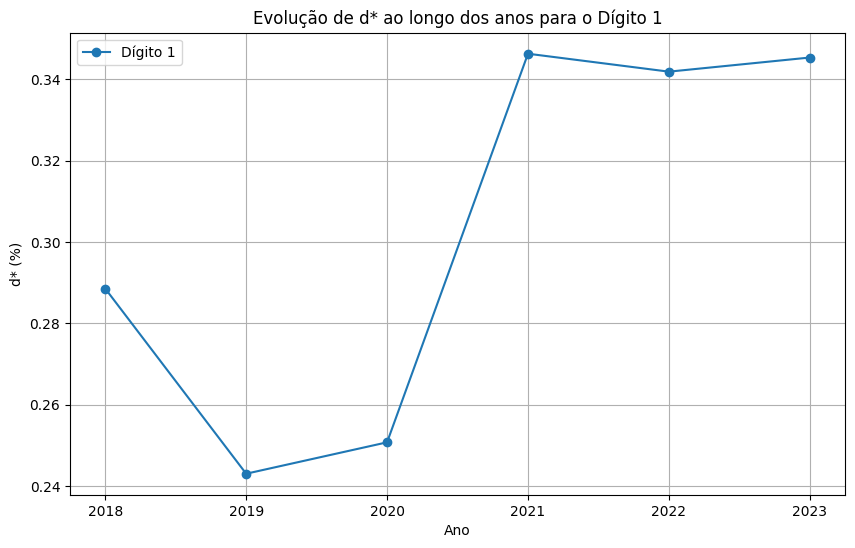

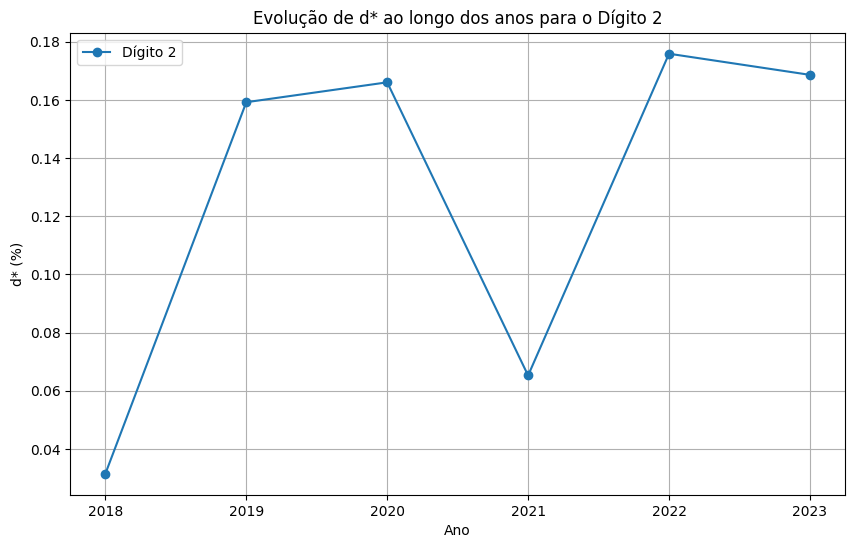

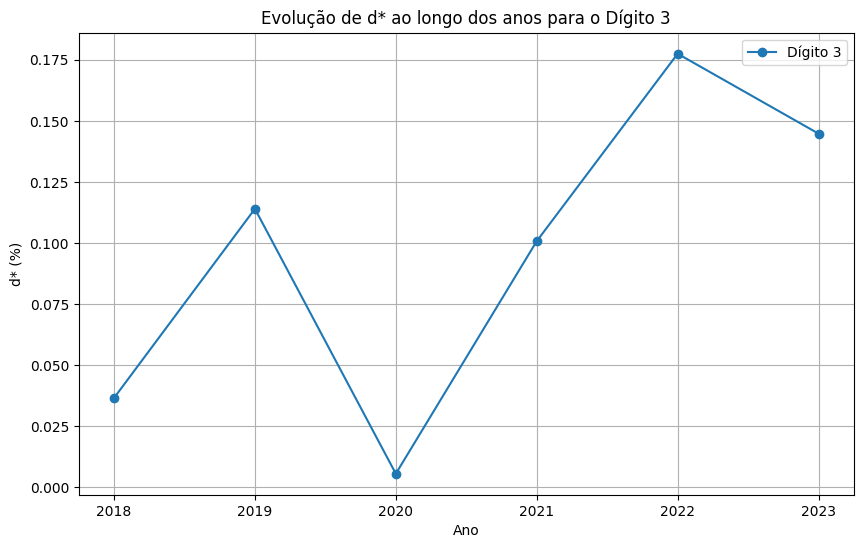

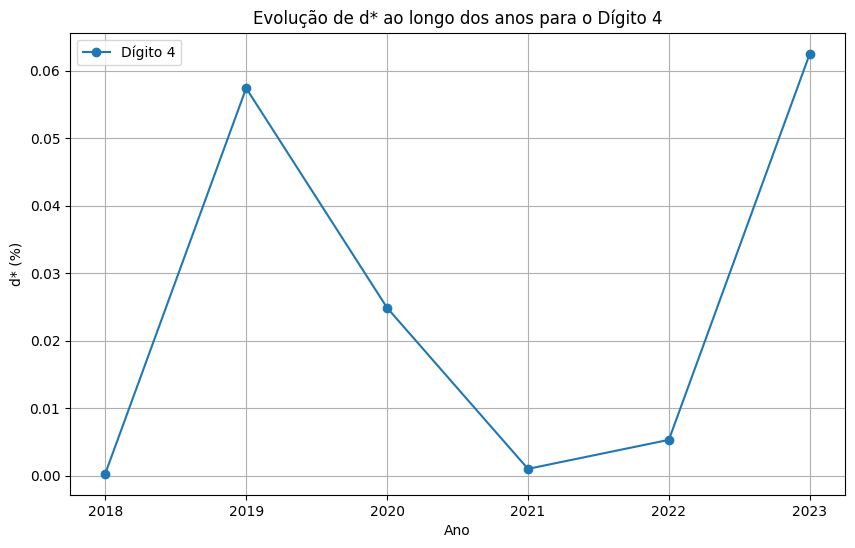

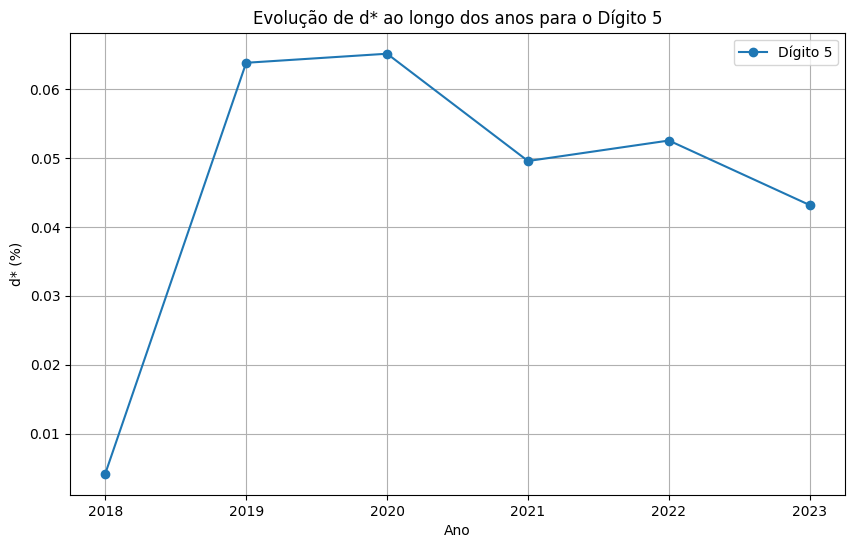

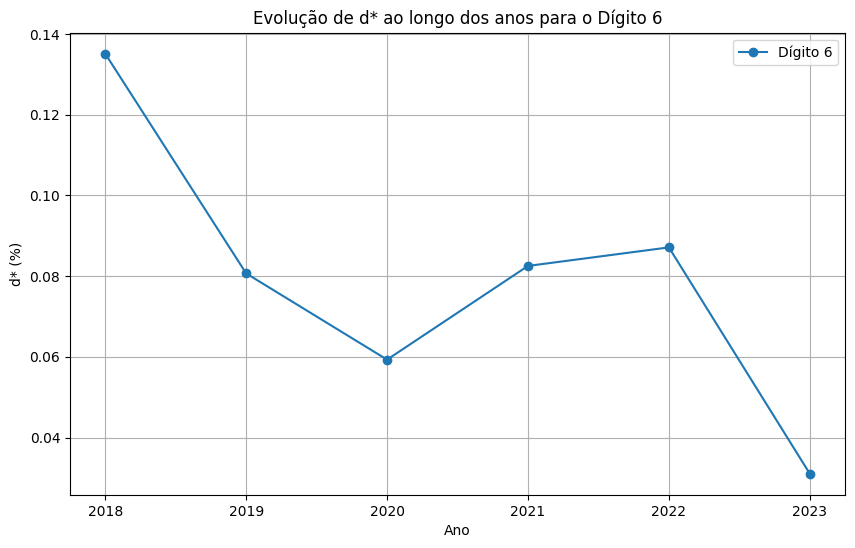

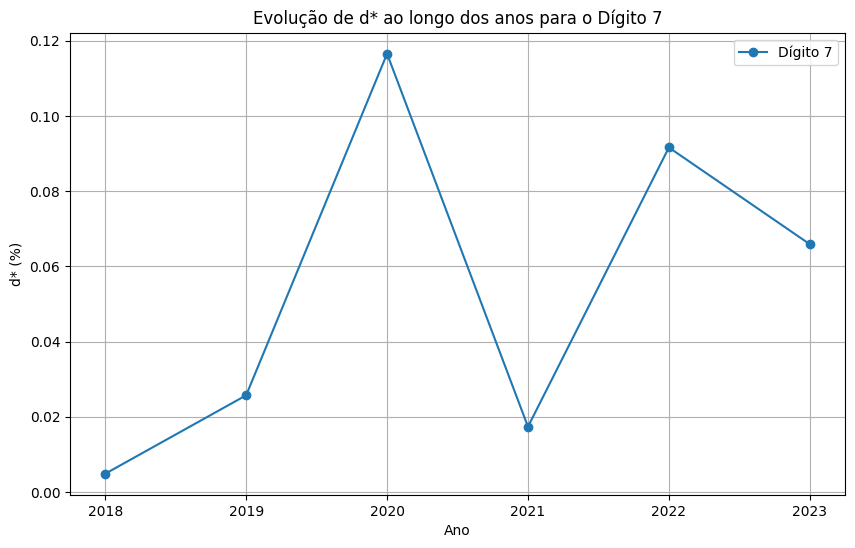

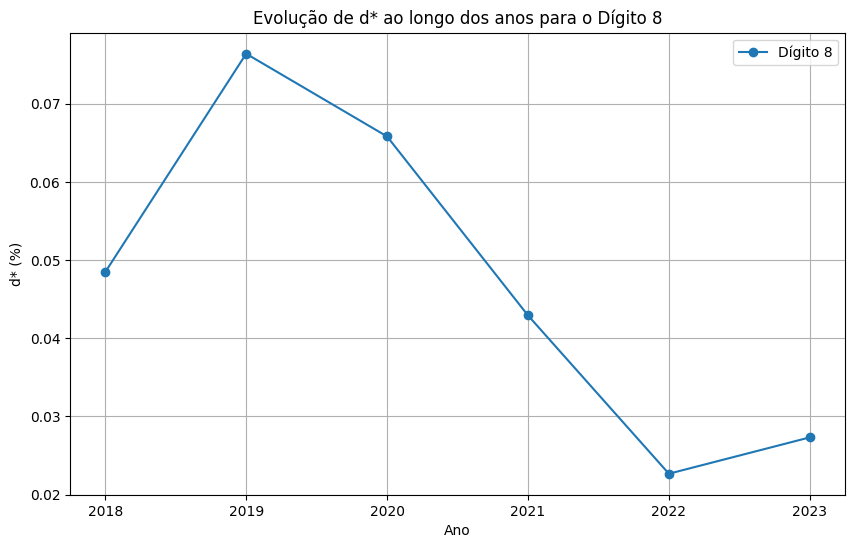

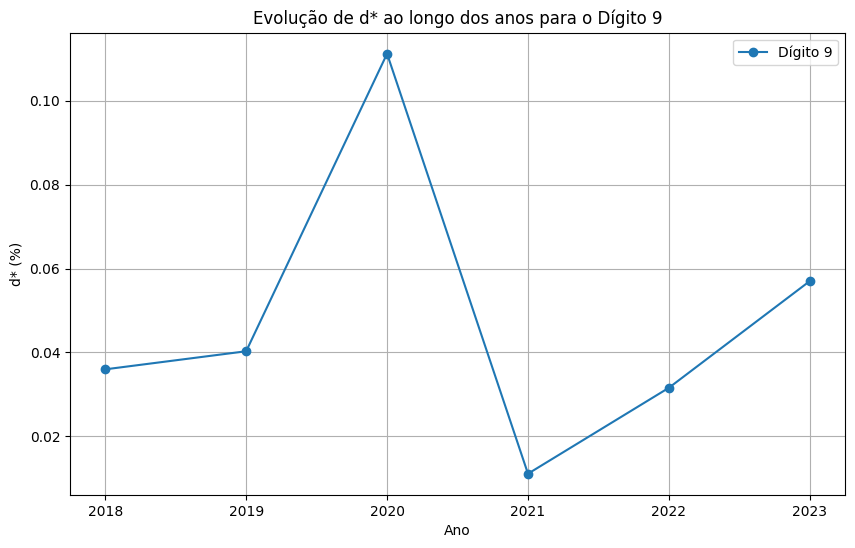

In [13]:
years = []
d_star_by_digit = {digit: [] for digit in range(1, 10)}  # Armazenar d* para cada dígito

# Iterar por ano e calcular para todas as empresas
for year, df in sorted(dfs_by_year.items()):  # Ordena os anos ao iterar
    print(f"Analisando o ano {year}:")

    total_frequencies = {}

    # Obter frequências do primeiro dígito para todas as empresas combinadas
    total_frequenciess = count_first_digits(df)
    total_frequencies.update(total_frequenciess)

    # Calcular porcentagens observadas a partir das frequências
    observed_perc = convert_to_percentage(total_frequencies)

    # Calcular a distribuição esperada de Benford em porcentagens
    benford_percentages = [benford_distribution(d) for d in range(1, 10)]

    # Calcular o d* entre as porcentagens observadas e esperadas para cada dígito
    for digit in range(1, 10):
        d_star_value = calculate_d_star([observed_perc[digit - 1]], [benford_percentages[digit - 1]])
        d_star_by_digit[digit].append(d_star_value)
        print(f"d* para o dígito {digit} no ano {year}: {d_star_value}%")

    # Adiciona o ano à lista
    years.append(year)

# Plotar os valores de d* ao longo dos anos para cada dígito
for digit in range(1, 10):
    plt.figure(figsize=(10, 6))
    plt.plot(years, d_star_by_digit[digit], marker='o', label=f'Dígito {digit}')

    # Configurações do gráfico
    plt.xlabel("Ano")
    plt.ylabel("d* (%)")
    plt.title(f"Evolução de d* ao longo dos anos para o Dígito {digit}")
    plt.legend()
    plt.grid(True)
    plt.show()


Analisando o ano 2018:
d* para o dígito 1 no ano 2018: 0.2885314203197582%
d* para o dígito 2 no ano 2018: 0.0314828004427661%
d* para o dígito 3 no ano 2018: 0.036527449553089626%
d* para o dígito 4 no ano 2018: 0.00026635309015837555%
d* para o dígito 5 no ano 2018: 0.004182917055961634%
d* para o dígito 6 no ano 2018: 0.13510397605960608%
d* para o dígito 7 no ano 2018: 0.004891538615703904%
d* para o dígito 8 no ano 2018: 0.048463901718051434%
d* para o dígito 9 no ano 2018: 0.03597831789634004%
Analisando o ano 2019:
d* para o dígito 1 no ano 2019: 0.24299575547583063%
d* para o dígito 2 no ano 2019: 0.15921334947582869%
d* para o dígito 3 no ano 2019: 0.11399468455457214%
d* para o dígito 4 no ano 2019: 0.05743504112712436%
d* para o dígito 5 no ano 2019: 0.0638158015554231%
d* para o dígito 6 no ano 2019: 0.08066526738934518%
d* para o dígito 7 no ano 2019: 0.025739121399257495%
d* para o dígito 8 no ano 2019: 0.0764011513429273%
d* para o dígito 9 no ano 2019: 0.040288733205026

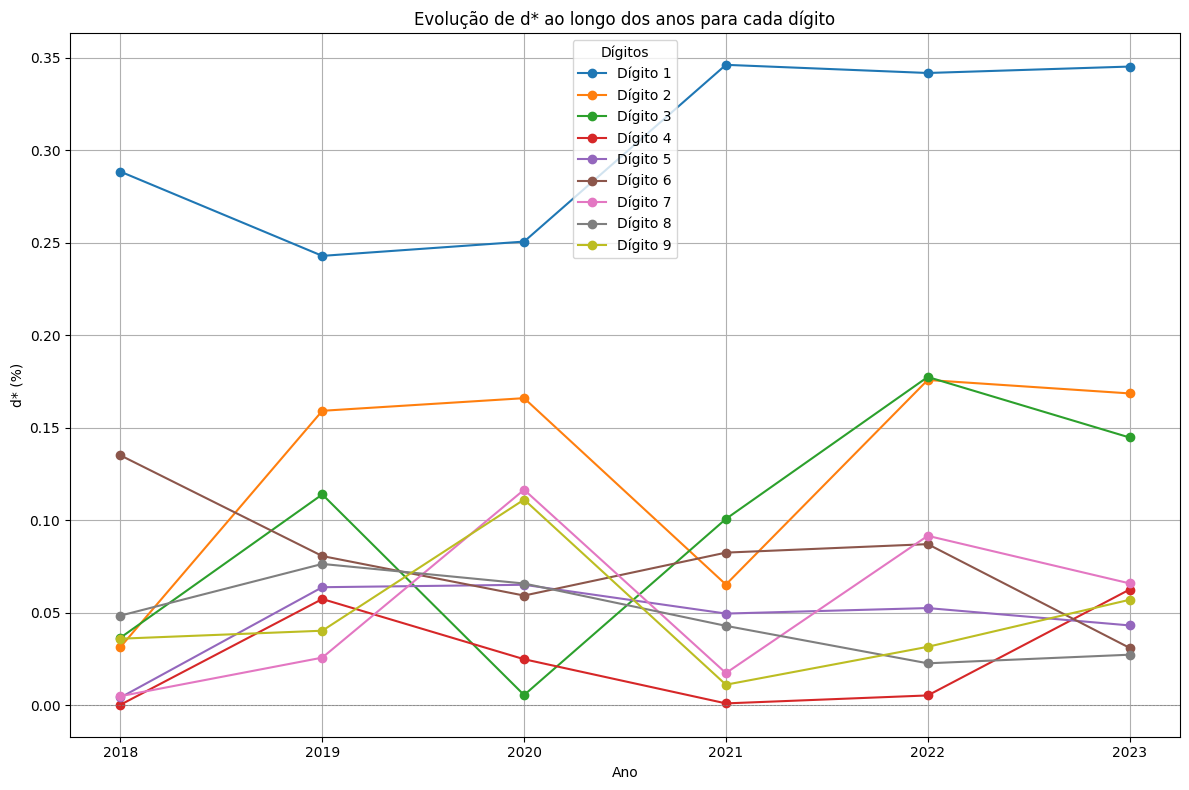

In [14]:
years = []
d_star_by_digit = {digit: [] for digit in range(1, 10)}  # Armazenar d* para cada dígito

# Iterar por ano e calcular para todas as empresas
for year, df in sorted(dfs_by_year.items()):  # Ordena os anos ao iterar
    print(f"Analisando o ano {year}:")

    # Obter frequências do primeiro dígito para todas as empresas combinadas
    total_frequencies = count_first_digits(df)

    # Calcular porcentagens observadas a partir das frequências
    observed_perc = convert_to_percentage(total_frequencies)

    # Calcular a distribuição esperada de Benford em porcentagens
    benford_percentages = [benford_distribution(d) for d in range(1, 10)]

    # Calcular o d* entre as porcentagens observadas e esperadas para cada dígito
    for digit in range(1, 10):
        d_star_value = calculate_d_star([observed_perc[digit - 1]], [benford_percentages[digit - 1]])
        d_star_by_digit[digit].append(d_star_value)
        print(f"d* para o dígito {digit} no ano {year}: {d_star_value}%")

    # Adiciona o ano à lista
    years.append(year)

# Plotar os valores de d* ao longo dos anos para cada dígito
plt.figure(figsize=(12, 8))
for digit in range(1, 10):
    plt.plot(years, d_star_by_digit[digit], marker='o', linestyle='-', label=f'Dígito {digit}')

# Configurações do gráfico
plt.title('Evolução de d* ao longo dos anos para cada dígito')
plt.xlabel('Ano')
plt.ylabel('d* (%)')
plt.xticks(years)  # Exibir todos os anos no eixo x
plt.grid()
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')  # Linha horizontal em y=0
plt.legend(title='Dígitos')
plt.tight_layout()  # Ajusta o layout do gráfico
plt.show()
